In [4]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Find the best hyperparameters using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score


In [5]:
data = pd.read_csv('creditcard.csv')

In [6]:
print("Initial few rows of the dataset: ")
data.head()

Initial few rows of the dataset: 


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
print("\nOverview of the features and their types:")
data.info()


Overview of the features and their types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20  

In [ ]:
class_counts = data['Class'].value_counts()
labels = ['Genuine', 'Fraud']
colors = ['lightgreen', 'red']
center_circle = plt.Circle((0, 0), 0.5, color='white')

plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=l

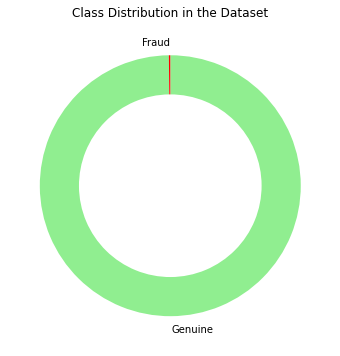

In [14]:
class_counts = data['Class'].value_counts()
labels = ['Genuine', 'Fraud']
colors = ['lightgreen', 'red']
center_circle = plt.Circle((0, 0), 0.5, color='white')

plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=labels, colors=colors, startangle=90, counterclock=False, wedgeprops=dict(width=0.3))
p = plt.gcf()
p.gca().add_artist(center_circle)

plt.title('Class Distribution in the Dataset')

plt.show()

In [15]:
print("\nStatistical summary of the dataset:")
data.describe()


Statistical summary of the dataset:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [16]:
print("\nColumns in the dataset:")
data.columns


Columns in the dataset:


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [17]:
print("\nMissing values in the dataset:")
data.isnull().sum()


Missing values in the dataset:


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

C:\Users\Yash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Yash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


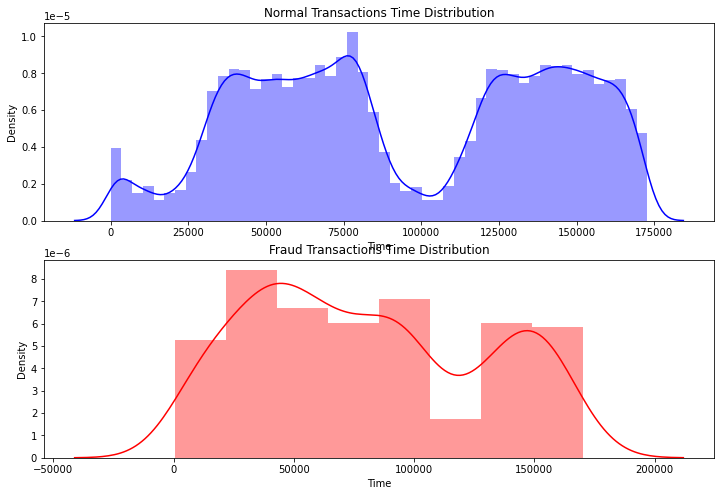

In [18]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
sns.distplot(data[data['Class'] == 0]["Time"], color='b')
plt.title('Normal Transactions Time Distribution')
plt.subplot(2, 1, 2)
sns.distplot(data[data['Class'] == 1]["Time"], color='r')
plt.title('Fraud Transactions Time Distribution')
plt.show()

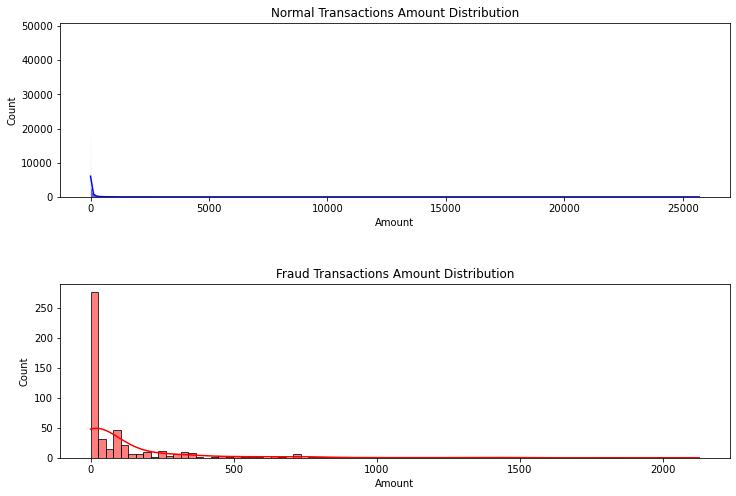

In [34]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
sns.histplot(data[data['Class'] == 0]["Amount"], color='b', kde=True)
plt.title('Normal Transactions Amount Distribution')
plt.subplots_adjust(hspace=0.5)
plt.subplot(2, 1, 2)
sns.histplot(data[data['Class'] == 1]["Amount"], color='r', kde=True)
plt.title('Fraud Transactions Amount Distribution')
plt.show()

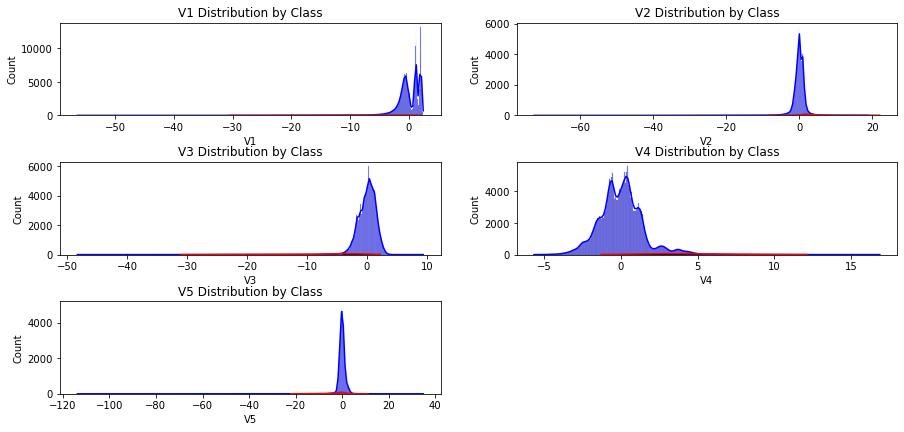

In [35]:
features = ['V1', 'V2', 'V3', 'V4', 'V5']
plt.figure(figsize=(15, 35))
for i, feature in enumerate(features, 1):
    plt.subplot(14, 2, i)
    sns.histplot(data[data['Class'] == 0][feature], color='b', kde=True)
    sns.histplot(data[data['Class'] == 1][feature], color='r', kde=True)
    plt.title(f'{feature} Distribution by Class')
    plt.subplots_adjust(hspace=0.5)
plt.show()

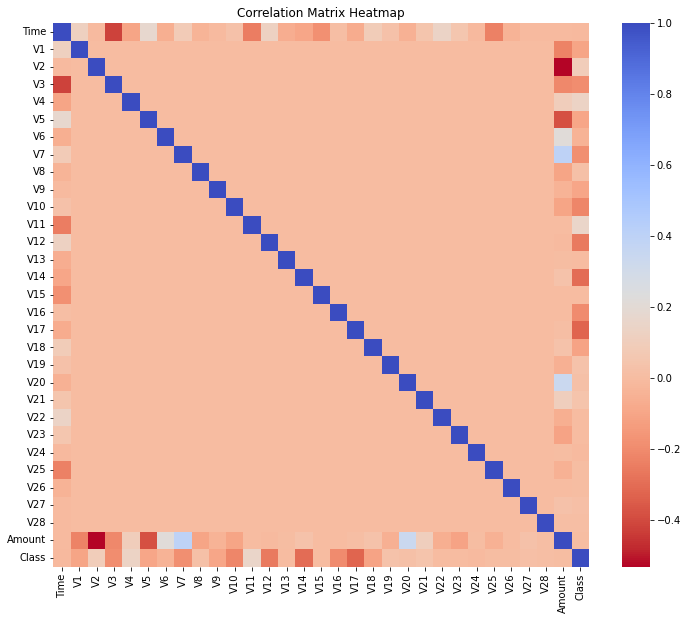

In [36]:
plt.figure(figsize=(12, 10))
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size': 10})
plt.title('Correlation Matrix Heatmap')
plt.show()

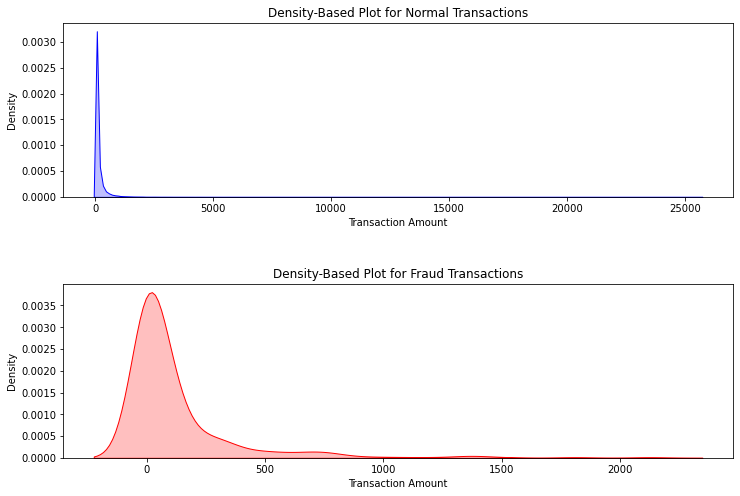

In [37]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
sns.kdeplot(data[data['Class'] == 0]["Amount"], shade=True, color='b', label='Normal Transactions')
plt.title('Density-Based Plot for Normal Transactions')
plt.xlabel('Transaction Amount')
plt.ylabel('Density')
plt.subplots_adjust(hspace=0.5)
plt.subplot(2, 1, 2)
sns.kdeplot(data[data['Class'] == 1]["Amount"], shade=True, color='r', label='Fraud Transactions')
plt.title('Density-Based Plot for Fraud Transactions')
plt.xlabel('Transaction Amount')
plt.ylabel('Density')
plt.show()

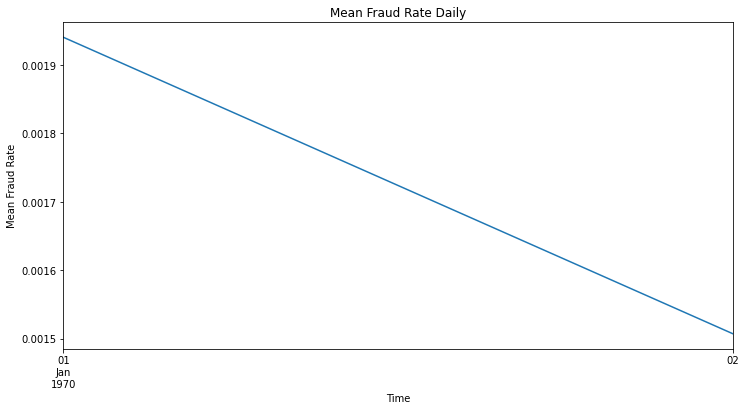

In [38]:
plt.figure(figsize=(12, 6))
data['Time'] = pd.to_datetime(data['Time'], unit='s')
data.set_index('Time', inplace=True)
data['Class'].resample('D').mean().plot()
plt.title('Mean Fraud Rate Daily')
plt.xlabel('Time')
plt.ylabel('Mean Fraud Rate')
plt.show()

In [39]:
normal_transactions = data[data['Class'] == 0]['Amount']
fraud_transactions = data[data['Class'] == 1]['Amount']
t_stat, p_val = ttest_ind(normal_transactions, fraud_transactions)
print(f"T-statistic: {t_stat}, P-value: {p_val}")

T-statistic: -3.00555231397141, P-value: 0.002651220649191683


In [44]:
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = IsolationForest(contamination=0.01, random_state=42)
model.fit(X_train)
y_pred = model.predict(X_test)

C:\Users\Yash\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [43]:
print("Classification Report for Anomaly Detection Model:")
print(classification_report(y_test, y_pred))

Classification Report for Anomaly Detection Model:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00     56864
           1       0.00      0.51      0.00        98

    accuracy                           0.00     56962
   macro avg       0.00      0.17      0.00     56962
weighted avg       0.00      0.00      0.00     56962



C:\Users\Yash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yash\anaconda3\lib\site-packages\sklearn\metrics\_classif

In [45]:
firewall_data = data[data['Amount'] > 1000]
fraudulent_firewall_transactions = firewall_data[firewall_data['Class'] == 1]
print("Fraudulent Transactions within Firewall:")
print(fraudulent_firewall_transactions)

Fraudulent Transactions within Firewall:
                            V1        V2         V3        V4        V5  \
Time                                                                      
1970-01-01 02:31:04  -3.499108  0.258555  -4.489558  4.853894 -6.974522   
1970-01-01 05:01:28 -12.224021  3.854150 -12.466766  9.648311 -2.726961   
1970-01-01 16:23:31  -2.326922 -3.348439  -3.513408  3.175060 -2.815137   
1970-01-01 17:21:07  -5.344665 -0.285760  -3.835616  5.337048 -7.609909   
1970-01-01 18:09:45  -2.923827  1.524837  -3.018758  3.289291 -5.755542   
1970-01-02 10:03:28  -2.003460 -7.159042  -4.050976  1.309580 -2.058102   
1970-01-02 12:59:44  -1.212682 -2.484824  -6.397186  3.670562 -0.863375   
1970-01-02 18:51:18  -1.600211 -3.488130  -6.459303  3.246816 -1.614608   
1970-01-02 18:51:49  -0.082983 -3.935919  -2.616709  0.163310 -1.400952   

                           V6         V7        V8        V9        V10  ...  \
Time                                                 

In [48]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l2']}
solver = 'liblinear'
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
grid_search = GridSearchCV(LogisticRegression(solver=solver, max_iter=1000), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print("Best parameter combinations: ", best_params)

Best parameter combinations:  {'C': 10, 'penalty': 'l2'}


In [52]:
pip install imbalanced-learn


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     -------------------------------------- 235.6/235.6 kB 4.8 MB/s eta 0:00:00
     -------------------------------------- 302.2/302.2 kB 1.3 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [53]:
from imblearn.over_sampling import SMOTE
scaler = StandardScaler() 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)
print("Original data shape:", X_train.shape, y_train.shape)
print("Resampled data shape:", X_resampled.shape, y_resampled.shape)

Original data shape: (227845, 29) (227845,)
Resampled data shape: (454902, 29) (454902,)


In [54]:
from xgboost import XGBClassifier

In [55]:
xgb_model = XGBClassifier()
xgb_model.fit(X_resampled, y_resampled)
y_pred_xgb = xgb_model.predict(X_test_scaled)
print("Classification Report for XGBoost Model:")
print(classification_report(y_test, y_pred_xgb))

Classification Report for XGBoost Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.78      0.85      0.81        98

    accuracy                           1.00     56962
   macro avg       0.89      0.92      0.91     56962
weighted avg       1.00      1.00      1.00     56962



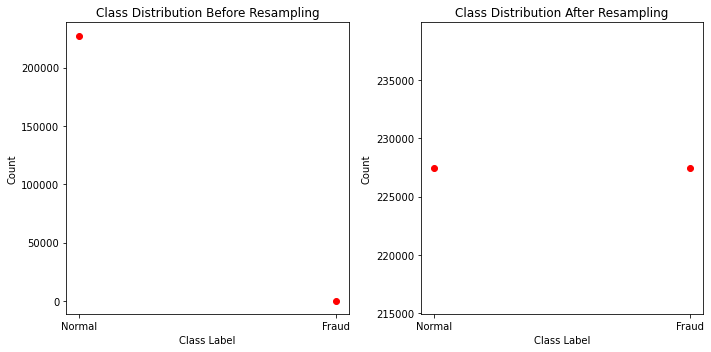

In [56]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Class Distribution Before Resampling')
plt.plot([0, 1], [sum(y_train==0), sum(y_train==1)], 'ro')
plt.xticks([0, 1], ['Normal', 'Fraud'])
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
plt.title('Class Distribution After Resampling')
plt.plot([0, 1], [sum(y_resampled==0), sum(y_resampled==1)], 'ro')
plt.xticks([0, 1], ['Normal', 'Fraud'])
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Original dataset shape: Counter({0: 284315, 1: 492})
Resampled dataset shape: Counter({0: 284315, 1: 284315})


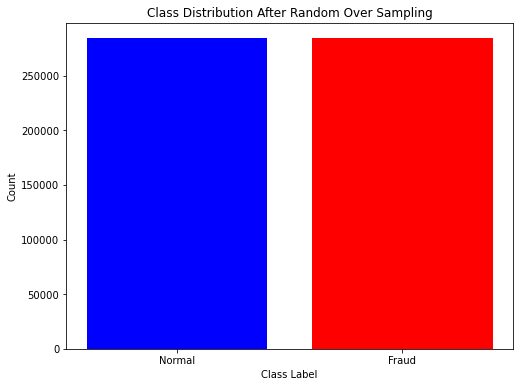

In [58]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
ros = RandomOverSampler(random_state=0)
X_resampled_aug, y_resampled_aug = ros.fit_resample(X, y)
print("Original dataset shape:", Counter(y))
print("Resampled dataset shape:", Counter(y_resampled_aug))
plt.figure(figsize=(8, 6))
plt.bar(Counter(y_resampled_aug).keys(), Counter(y_resampled_aug).values(), color=['b', 'r'])
plt.xticks(list(Counter(y_resampled_aug).keys()), ['Normal', 'Fraud'])
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Class Distribution After Random Over Sampling')
plt.show()

In [61]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')
accuracy = accuracy_score(y_test, y_pred)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)
print("Accuracy: ", accuracy)

Precision:  0.0008777781679014079
Recall:  0.0008777781679014079
F1 Score:  0.0008777781679014079
Accuracy:  0.0008777781679014079


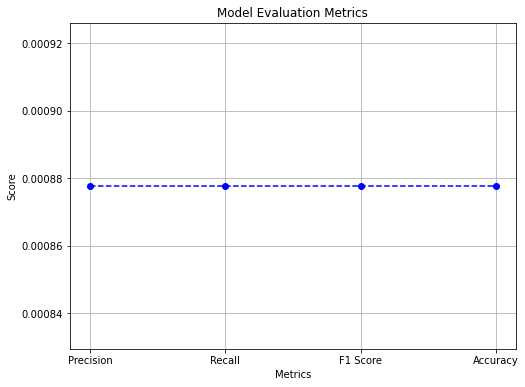

In [62]:
metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
scores = [precision, recall, f1, accuracy]
plt.figure(figsize=(8, 6))
plt.plot(metrics, scores, marker='o', linestyle='--', color='b')
plt.title('Model Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.grid(True)
plt.show()

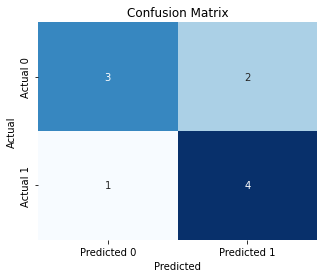

In [64]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
y_true = [1, 0, 1, 1, 0, 1, 0, 1, 0, 0]
y_pred = [1, 0, 1, 0, 0, 1, 1, 1, 0, 1]
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
